In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from IPython.display import HTML
from tqdm import tqdm_notebook 
import seaborn as sns
import imageio



In [ ]:
data, labels = make_blobs(n_samples=1000,     # total samples
                          centers=4,          # how many clusters
                          n_features=2,       # x and y only
                          random_state=0)     # same output repeatable

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (1000, 2)
Labels shape: (1000,)


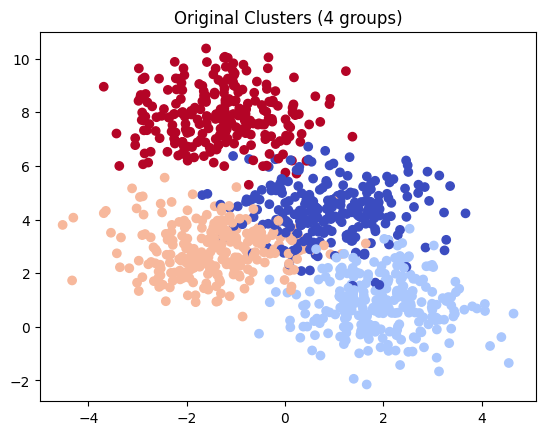

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')
plt.title("Original Clusters (4 groups)")
plt.show()

In [ ]:
labels_original = labels
labels = np.mod(labels_original, 2)

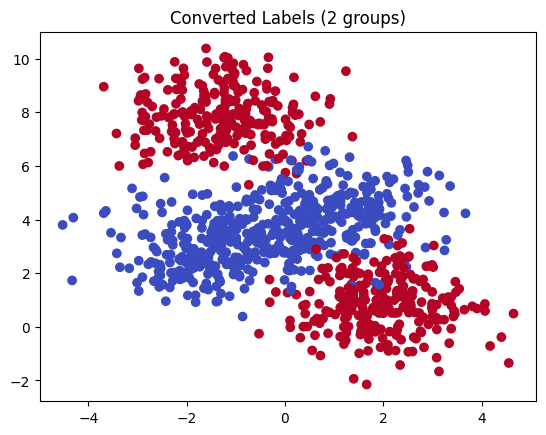

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm')
plt.title("Converted Labels (2 groups)")
plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data,
                                                  labels,
                                                  stratify=labels,
                                                  random_state=0)

print(" shape", X_train.shape, Y_train.shape)
print("valid", X_val.shape, Y_val.shape)

 shape (750, 2) (750,)
valid (250, 2) (250,)


In [ ]:
class FFNetworkW1:
    

    def __init__(self):
      
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        
       
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0

In [ ]:
def sigmoid(self, x):
	return 1.0 / (1.0 + np.exp(-x))

In [ ]:
def forward_pass(self, x):
        self.x1, self.x2 = x

        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)

        
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)

     
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)

        return self.h3

In [ ]:
def grad(self, x, y):
        self.forward_pass(x)
       
        self.dw1 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w5 * self.h1*(1 - self.h1) * self.x1

In [ ]:
def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
        if display_loss:
            loss_history = {}
            w1_history = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1 = 0
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
            m = X.shape[0]
            self.w1 -= learning_rate * dw1 / m
            if display_loss:
                w1_history[i] = self.w1
                Y_pred = self.predict(X)
                loss_history[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1)
            plt.plot(w1_history.values())
            plt.xlabel("Epochs"); plt.ylabel("W1 value"); plt.title("W1 over epochs")
            plt.subplot(1,2,2)
            plt.plot(loss_history.values())
            plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.title("Loss curve")
            plt.show()

In [ ]:
def predict(self, X):
        return np.array([self.forward_pass(x) for x in X])

  0%|          | 0/500 [00:00<?, ?epoch/s]

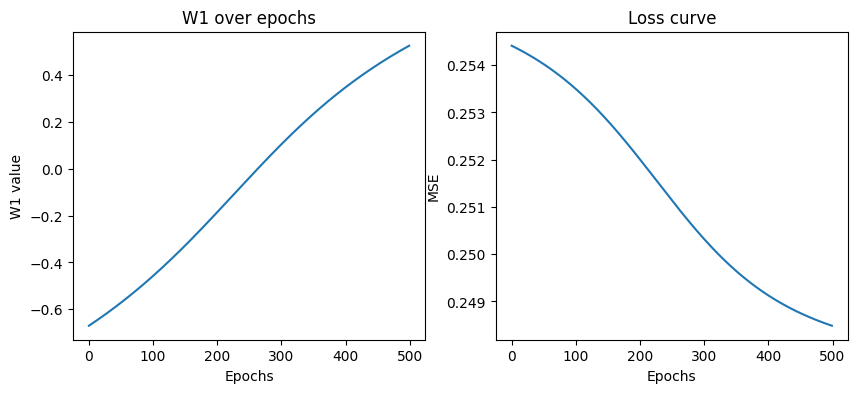

Predictions on validation set:
[0.50835869 0.53139952 0.51506595 0.50109961 0.52803164]


In [ ]:
ffnw1 = FFNetworkW1()


ffnw1.fit(X_train, Y_train, epochs=500, learning_rate=1, display_loss=True)


print("Prediction")
print(ffnw1.predict(X_val[:5]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error

class FFNetworkW1:
    
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dw1 = (self.h3 - y) * self.h3*(1 - self.h3) * self.w5 * self.h1*(1 - self.h1) * self.x1
    
    def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
        if display_loss:
            loss_history = {}
            w1_history = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1 = 0
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
            m = X.shape[0]
            self.w1 -= learning_rate * dw1 / m
            if display_loss:
                w1_history[i] = self.w1
                Y_pred = self.predict(X)
                loss_history[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1)
            plt.plot(w1_history.values())
            plt.xlabel("Epochs"); plt.ylabel("W1 value"); plt.title("W1 over epochs")
            plt.subplot(1,2,2)
            plt.plot(loss_history.values())
            plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.title("Loss curve")
            plt.show()
    
    def predict(self, X):
        return np.array([self.forward_pass(x) for x in X])
    